Prediction of Bank Products for UpSelling using Random Forest Model

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
#---visualization---
import matplotlib.pyplot as plt
import seaborn as sns
#---machine learning---
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#loading data
data =pd.read_csv(r"C:\Users\Ishwari Kadam\Desktop\Projects\Cross_Up Sell Model for Bank products\customer summary data.csv")

In [3]:
data.columns

Index(['ACQUISITION_COST', 'AGE_RANGE', 'ANNUAL_INCOME', 'BIRTH_YEAR',
       'CONTACT_PREFERENCE', 'CREDIT_AUTHORITY_LEVEL', 'CREDIT_SCORE',
       'CURRENT_EMPLOYMENT_START_DATE', 'CUSTOMER_BEHAVIOR', 'CUSTOMER_ID',
       'DATE_FIRST_ACCOUNT_OPENED', 'DATE_LAST_ACCOUNT_OPENED',
       'EDUCATION_LEVEL', 'EFFECTIVE_DATE', 'EMPLOYMENT_STATUS', 'FAMILY_SIZE',
       'GENDER', 'HEAD_OF_HOUSEHOLD_INDICATOR', 'HOME_OWNER_INDICATOR',
       'IMPORTANCE_LEVEL_CODE', 'INTERNET_BANKING_INDICATOR',
       'LOYALTY_RATING_CODE', 'MARITAL_STATUS', 'MARKET_GROUP',
       'MONTHLY_HOUSING_COST', 'MONTHLY_NET_INCOME',
       'NUMBER_OF_DEPENDENT_CHILDREN', 'PREFERRED_COMMUNICATION_FORM',
       'PRIMARY_SPOKEN_LANGUAGE', 'PRIMARY_WRITTEN_LANGUAGE', 'PROFESSION',
       'PURSUIT', 'REFERRALS_VALUE_CODE', 'RELATIONSHIP_START_DATE',
       'RETIREMENT_AGE', 'SATISFACTION_RATING_FROM_SURVEY',
       'SPECIAL_TERMS_INDICATOR', 'STATUS', 'STATUS_DATE',
       'WALLET_SHARE_PERCENTAGE', 'ASSETS', 'FUNDS_U

In [4]:
#rearranging columns to keep Pursuit dependent varaible at last
new_order = ['ACQUISITION_COST', 'AGE_RANGE', 'ANNUAL_INCOME', 'BIRTH_YEAR',
       'CONTACT_PREFERENCE', 'CREDIT_AUTHORITY_LEVEL', 'CREDIT_SCORE',
       'CURRENT_EMPLOYMENT_START_DATE', 'CUSTOMER_BEHAVIOR', 'CUSTOMER_ID',
       'DATE_FIRST_ACCOUNT_OPENED', 'DATE_LAST_ACCOUNT_OPENED',
       'EDUCATION_LEVEL', 'EFFECTIVE_DATE', 'EMPLOYMENT_STATUS', 'FAMILY_SIZE',
       'GENDER', 'HEAD_OF_HOUSEHOLD_INDICATOR', 'HOME_OWNER_INDICATOR',
       'IMPORTANCE_LEVEL_CODE', 'INTERNET_BANKING_INDICATOR',
       'LOYALTY_RATING_CODE', 'MARITAL_STATUS', 'MARKET_GROUP',
       'MONTHLY_HOUSING_COST', 'MONTHLY_NET_INCOME',
       'NUMBER_OF_DEPENDENT_CHILDREN', 'PREFERRED_COMMUNICATION_FORM',
       'PRIMARY_SPOKEN_LANGUAGE', 'PRIMARY_WRITTEN_LANGUAGE', 'PROFESSION',
       'REFERRALS_VALUE_CODE', 'RELATIONSHIP_START_DATE',
       'RETIREMENT_AGE', 'SATISFACTION_RATING_FROM_SURVEY',
       'SPECIAL_TERMS_INDICATOR', 'STATUS', 'STATUS_DATE',
       'WALLET_SHARE_PERCENTAGE', 'ASSETS', 'FUNDS_UNDER_MANAGEMENT',
       'TOP_SPENDING_CATEGORY', 'PURSUIT']
data = data[new_order]

In [5]:
data.info() #no null values in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ACQUISITION_COST                 1000 non-null   float64
 1   AGE_RANGE                        1000 non-null   object 
 2   ANNUAL_INCOME                    1000 non-null   float64
 3   BIRTH_YEAR                       1000 non-null   int64  
 4   CONTACT_PREFERENCE               1000 non-null   object 
 5   CREDIT_AUTHORITY_LEVEL           1000 non-null   object 
 6   CREDIT_SCORE                     1000 non-null   float64
 7   CURRENT_EMPLOYMENT_START_DATE    1000 non-null   object 
 8   CUSTOMER_BEHAVIOR                1000 non-null   object 
 9   CUSTOMER_ID                      1000 non-null   int64  
 10  DATE_FIRST_ACCOUNT_OPENED        1000 non-null   object 
 11  DATE_LAST_ACCOUNT_OPENED         1000 non-null   object 
 12  EDUCATION_LEVEL      

EDA

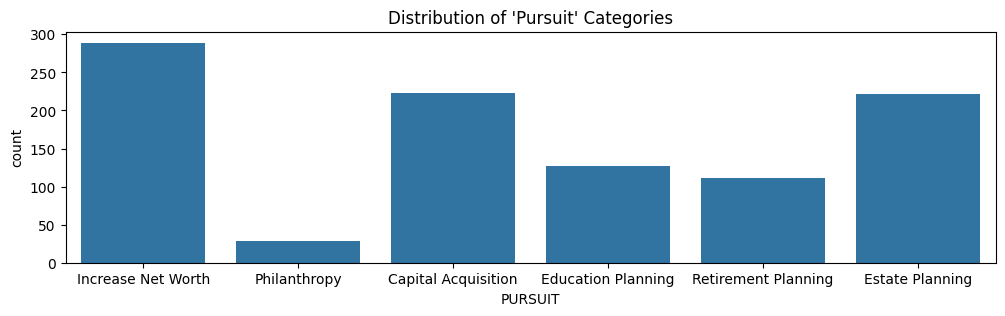

In [7]:
#check count of customers in each category of target variable 
plt.figure(figsize=(12, 3))
sns.countplot(x='PURSUIT', data=data)
plt.title("Distribution of 'Pursuit' Categories")
plt.show()

In [6]:
#convert target category to numerical 
le = LabelEncoder()
data['Pursuit_encoded'] = le.fit_transform(data['PURSUIT'])
target_classes = le.classes_

In [7]:
data

,ACQUISITION_COST,AGE_RANGE,ANNUAL_INCOME,BIRTH_YEAR,CONTACT_PREFERENCE,CREDIT_AUTHORITY_LEVEL,CREDIT_SCORE,CURRENT_EMPLOYMENT_START_DATE,CUSTOMER_BEHAVIOR,CUSTOMER_ID,...,SATISFACTION_RATING_FROM_SURVEY,SPECIAL_TERMS_INDICATOR,STATUS,STATUS_DATE,WALLET_SHARE_PERCENTAGE,ASSETS,FUNDS_UNDER_MANAGEMENT,TOP_SPENDING_CATEGORY,PURSUIT,Pursuit_encoded
0,49.482739,40 to 55,121600.00,1962,mail,Very Low,770.955475,24/06/2015,Growth,1088,...,very satisfied,0,Active,05/05/2018,53,192471,80000,Utilities,Increase Net Worth,3
1,45.554358,40 to 55,95056.00,1962,email,Low,730.319018,14/08/2016,Growth,1238,...,satisfied,0,Active,15/04/2018,42,156486,150000,Utilities,Philanthropy,4
2,24.355866,30 to 40,49835.00,1984,phone,Very High,651.724507,06/02/2015,Conserviti,1342,...,neutral,1,Active,04/02/2016,61,70256,300000,Recreation,Capital Acquisition,0
3,87.602257,65 and over,158985.00,1947,mail,Very High,705.026860,27/11/2015,Aggressive,1580,...,very satisfied,1,Inactive,26/01/2018,9,214945,750000,Insurance,Increase Net Worth,3
4,11.385694,23 to 30,90193.75,1992,phone,High,659.077190,28/05/2017,Conserviti,1591,...,neutral,1,Inactive,22/01/2018,6,88900,300000,Recreation,Education Planning,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19.521944,65 and over,131684.00,1935,mail,Very High,797.030521,31/05/2015,Aggressive,1882,...,very satisfied,0,Active,26/05/2016,70,235222,1250000,Uncategorized,Retirement Planning,5
996,53.894103,40 to 55,47556.00,1969,none,High,787.535817,18/07/2017,Moderate,1993,...,satisfied,0,Active,19/01/2018,23,87484,300000,Personal,Estate Planning,2
997,44.493103,55 to 65,93818.00,1959,none,Low,666.522216,03/05/2015,Growth,1138,...,satisfied,1,Active,12/06/2017,14,154300,150000,Health,Philanthropy,4
998,72.661805,40 to 55,96189.00,1965,none,Low,750.130951,06/05/2014,Growth,1413,...,satisfied,0,Active,11/01/2016,25,153572,150000,Personal,Estate Planning,2


In [9]:
# Select only the categorical features
independent_featurescat = data.select_dtypes(include='object').columns

# Select only the numerical features
independent_featuresnum = data.select_dtypes(include=['int64', 'float64']).columns

In [12]:
independent_featurescat = independent_featurescat.drop(['CURRENT_EMPLOYMENT_START_DATE', 'DATE_FIRST_ACCOUNT_OPENED', 'DATE_LAST_ACCOUNT_OPENED', 
                                                       'EFFECTIVE_DATE', 'RELATIONSHIP_START_DATE', 'STATUS_DATE' ], errors='ignore')

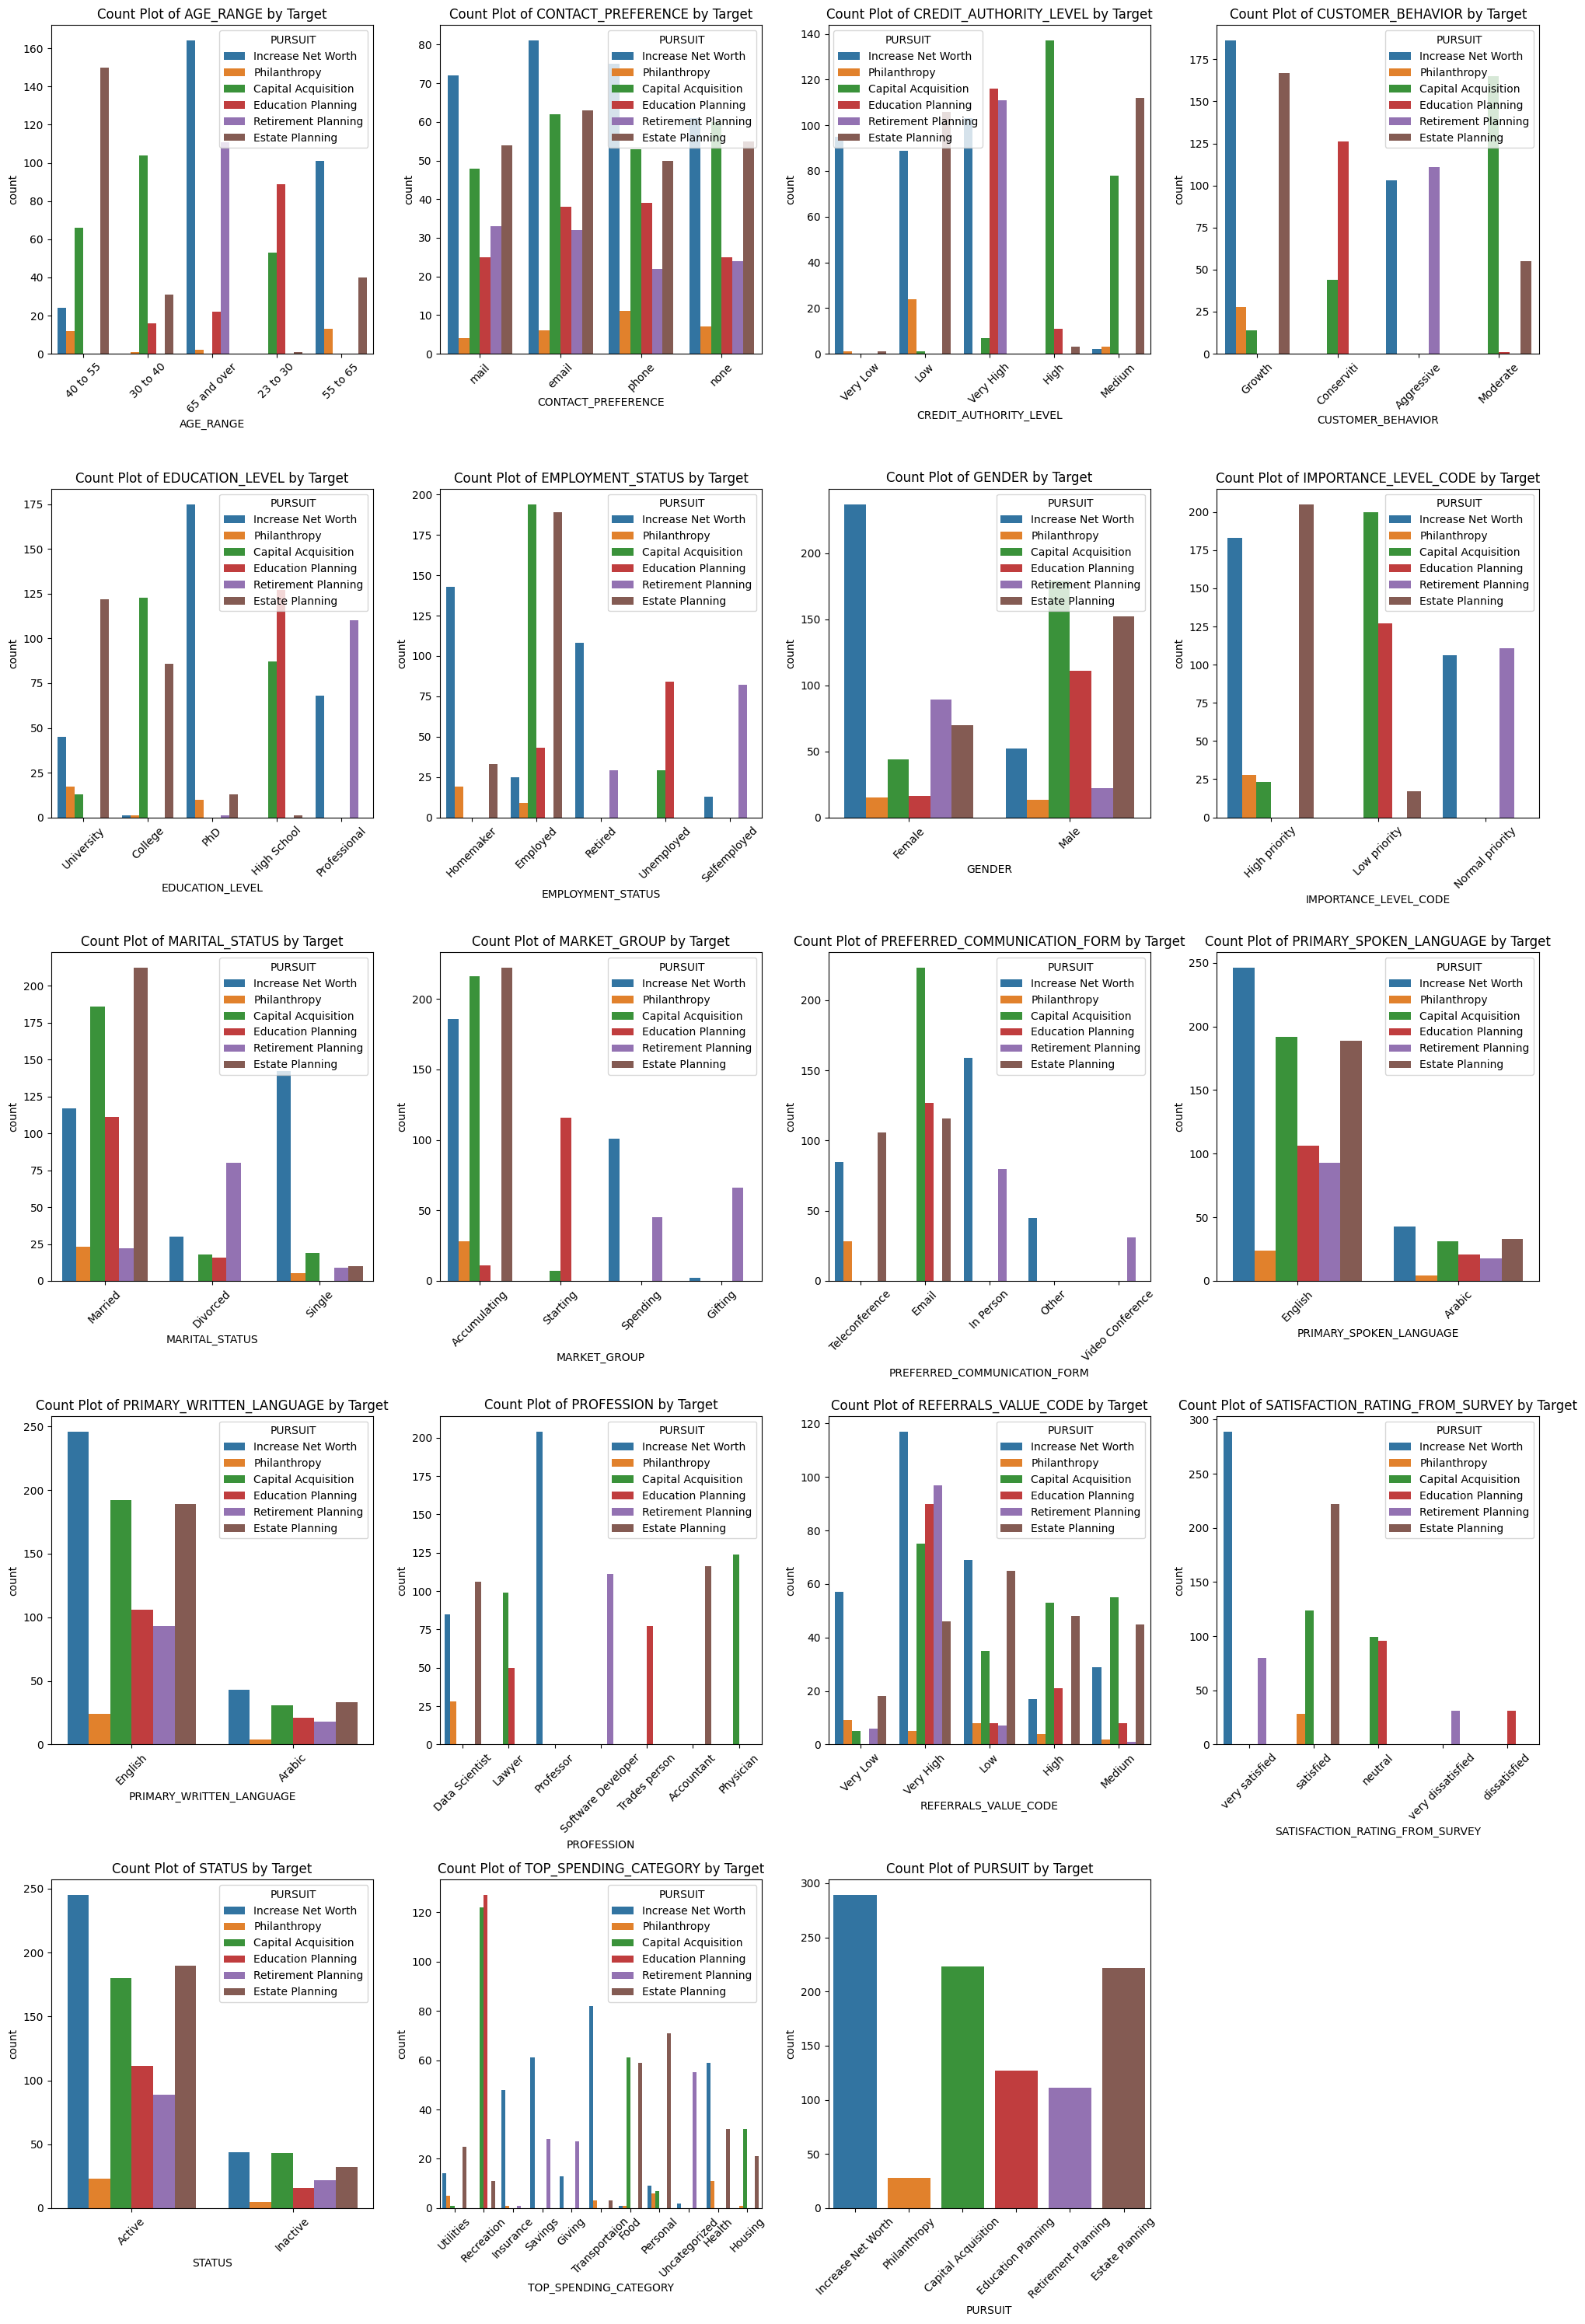

In [16]:
import math
n_cols = 4
n_rows = math.ceil(len(independent_featurescat) / n_cols)

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each categorical feature and create a count plot
for i, feature in enumerate(independent_featurescat):
    sns.countplot(x=feature, hue='PURSUIT', data=data, ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature} by Target')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Interpretation - People who are in age group of 65 and more, have growth mindset as customer behaviour, primarily speaks english and females with Phd education shows interest in increase net worth products.
People who are younsters, have conservative behaviour and males who are in high school tend to go for education planning products.
Married men in age group of 30-40 tend to go for capital acquisition plans.
People over 65 age go for retirement planning.
Men who are in growth mindset and falls in accumulating market group goes for estate planning products.

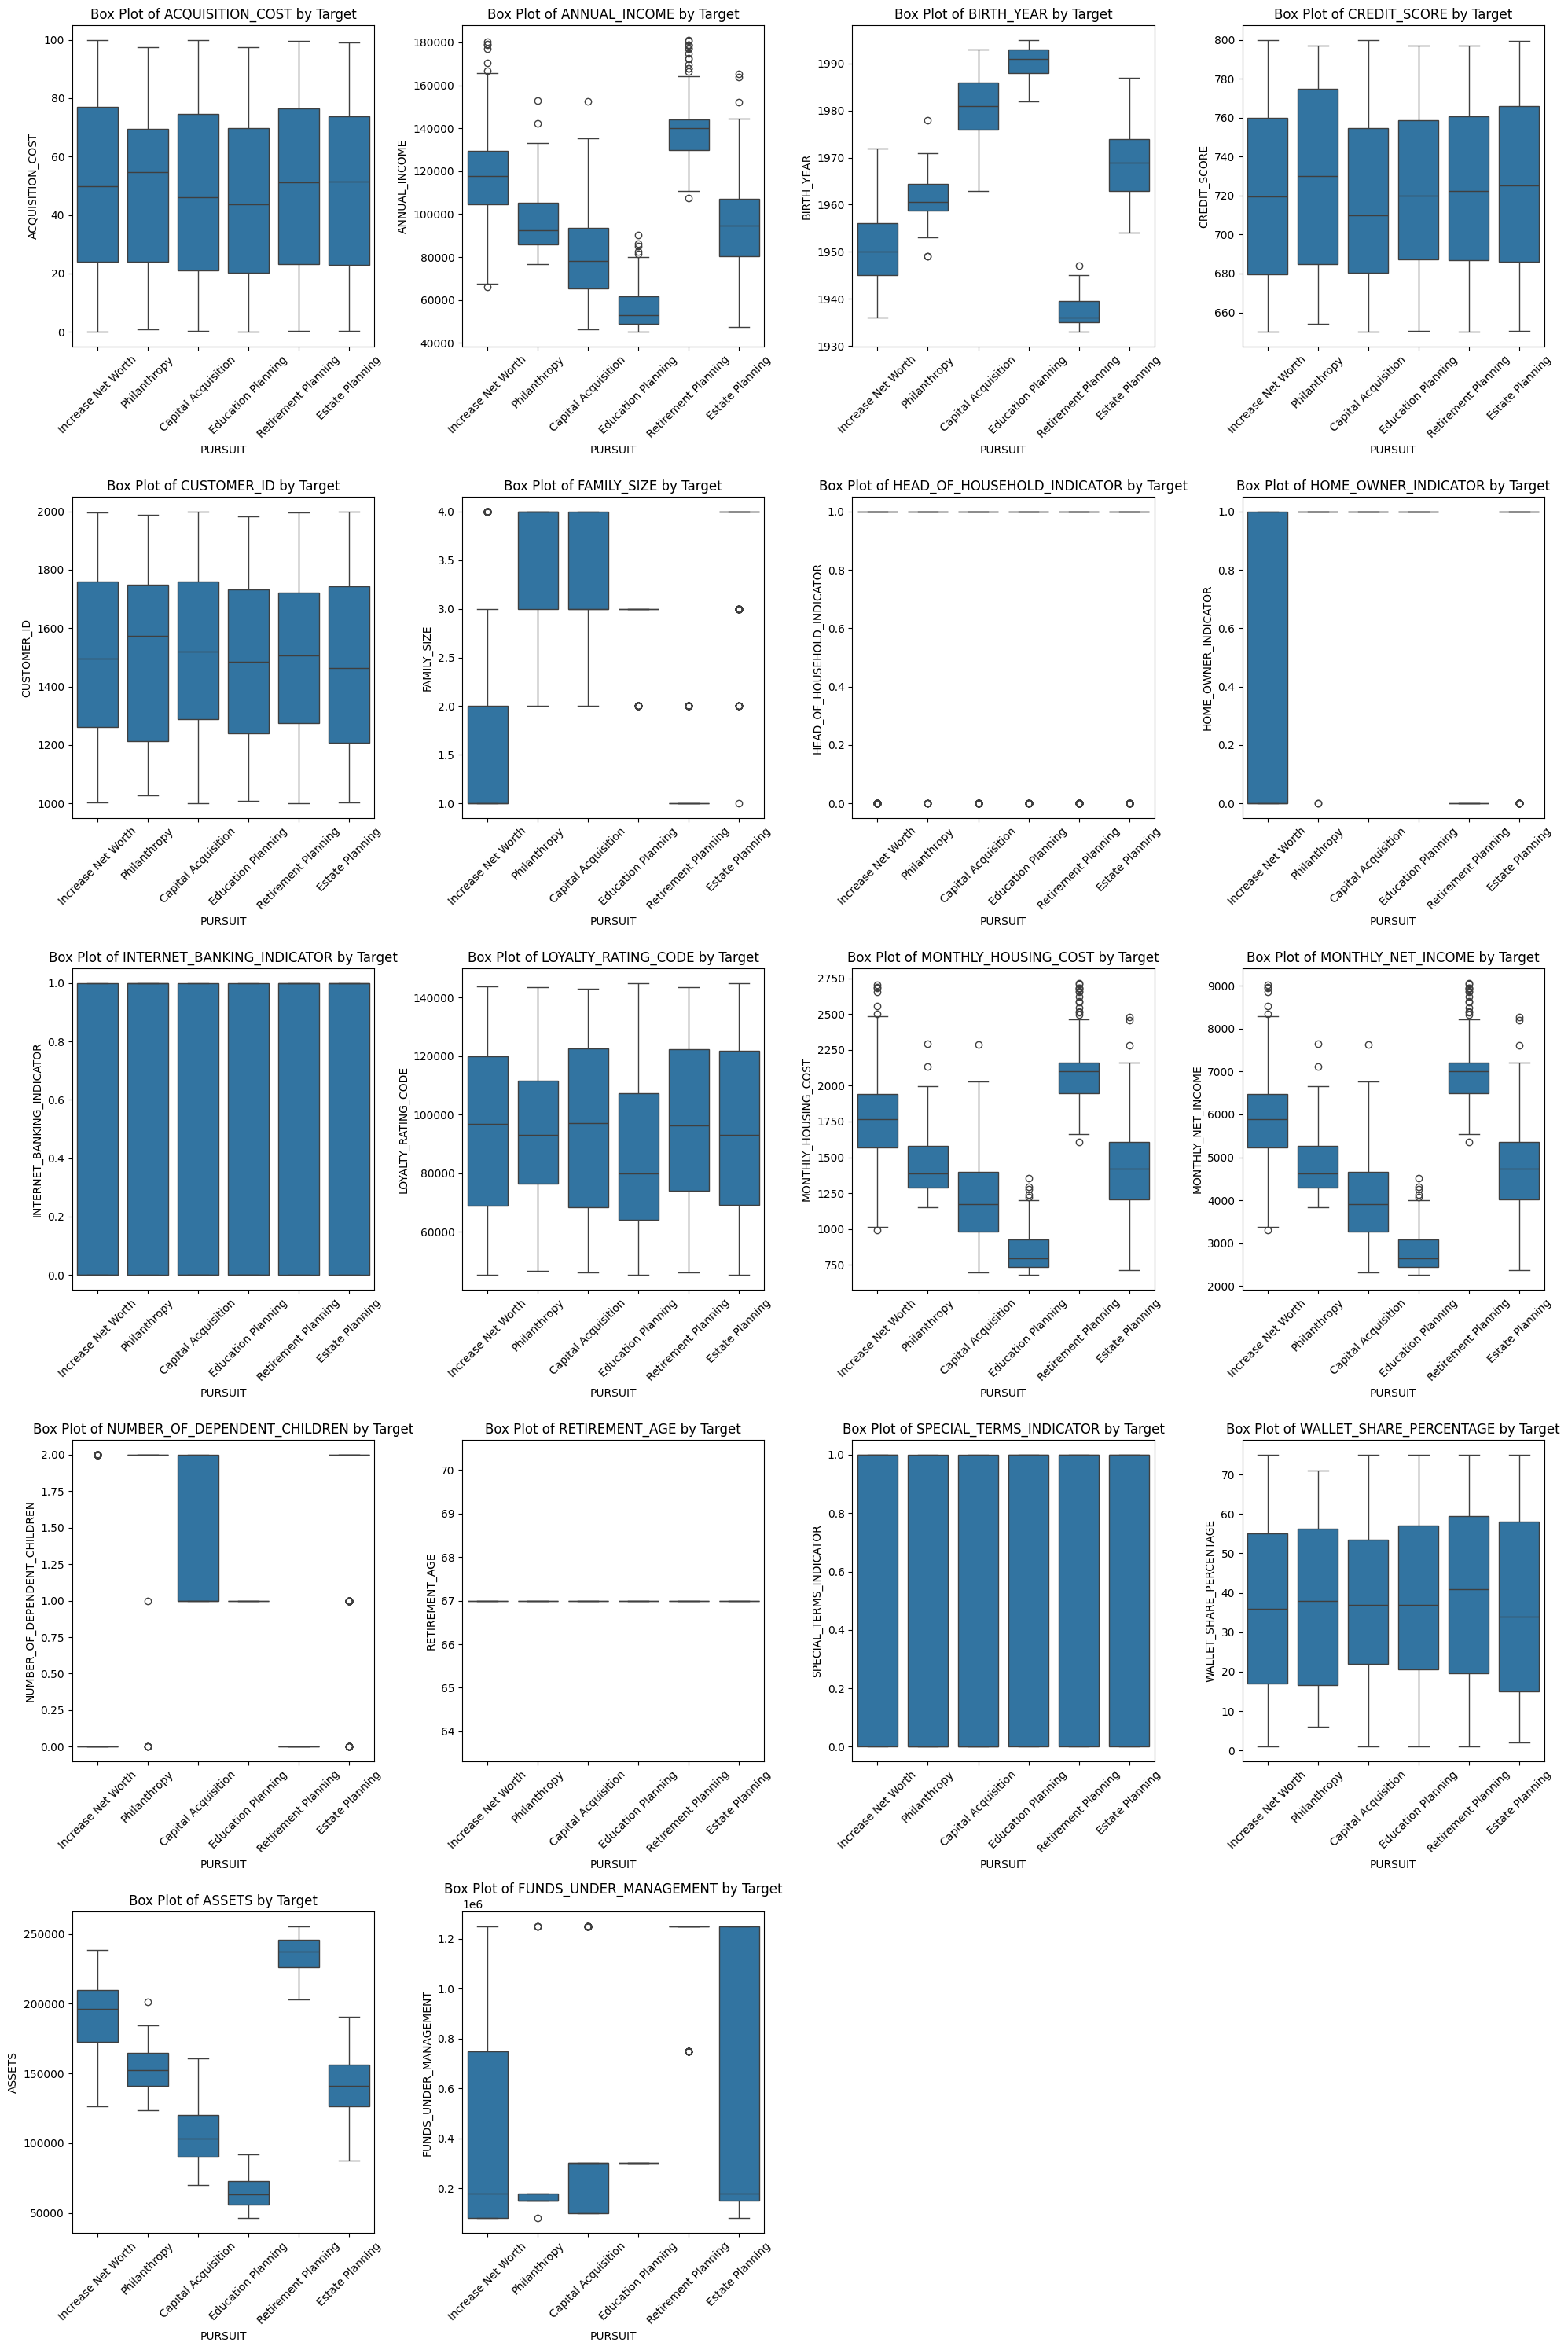

In [19]:
n_cols = 4
n_rows = math.ceil(len(independent_featuresnum) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each numerical feature and create a box plot
for i, feature in enumerate(independent_featuresnum):
    sns.boxplot(x='PURSUIT', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Target')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Interpretation - 

Data Preprocessing

In [24]:
data1 = data.copy()

In [25]:
#drop columns
data1 = data1.drop(['CUSTOMER_ID', 'EFFECTIVE_DATE', 'STATUS_DATE', 'RELATIONSHIP_START_DATE', 'CURRENT_EMPLOYMENT_START_DATE', 
              'DATE_FIRST_ACCOUNT_OPENED', 'DATE_LAST_ACCOUNT_OPENED'], axis=1)

In [26]:
# Encode categorical variables
label_encoders = {}
for col in data1.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data1[col] = le.fit_transform(data1[col])
    label_encoders[col] = le  

In [31]:
data1.drop(columns = 'Pursuit_encoded', inplace = True)

In [32]:
data1

,ACQUISITION_COST,AGE_RANGE,ANNUAL_INCOME,BIRTH_YEAR,CONTACT_PREFERENCE,CREDIT_AUTHORITY_LEVEL,CREDIT_SCORE,CUSTOMER_BEHAVIOR,EDUCATION_LEVEL,EMPLOYMENT_STATUS,...,REFERRALS_VALUE_CODE,RETIREMENT_AGE,SATISFACTION_RATING_FROM_SURVEY,SPECIAL_TERMS_INDICATOR,STATUS,WALLET_SHARE_PERCENTAGE,ASSETS,FUNDS_UNDER_MANAGEMENT,TOP_SPENDING_CATEGORY,PURSUIT
0,49.482739,2,121600.00,1962,1,4,770.955475,2,4,1,...,4,67,4,0,0,53,192471,80000,10,3
1,45.554358,2,95056.00,1962,0,1,730.319018,2,4,1,...,4,67,2,0,0,42,156486,150000,10,4
2,24.355866,1,49835.00,1984,3,3,651.724507,1,0,0,...,3,67,1,1,0,61,70256,300000,6,0
3,87.602257,4,158985.00,1947,1,3,705.026860,0,2,2,...,1,67,4,1,1,9,214945,750000,4,3
4,11.385694,0,90193.75,1992,3,0,659.077190,1,1,4,...,0,67,1,1,1,6,88900,300000,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19.521944,4,131684.00,1935,1,3,797.030521,0,3,3,...,3,67,4,0,0,70,235222,1250000,9,5
996,53.894103,2,47556.00,1969,2,0,787.535817,3,4,1,...,0,67,2,0,0,23,87484,300000,5,2
997,44.493103,3,93818.00,1959,2,1,666.522216,2,4,1,...,1,67,2,1,0,14,154300,150000,2,4
998,72.661805,2,96189.00,1965,2,1,750.130951,2,4,0,...,3,67,2,0,0,25,153572,150000,5,2


In [33]:
#define independent and dependent feature
X = data1.drop('PURSUIT', axis=1)
y = data1['PURSUIT']

In [34]:
#normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
#splitting data 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building - Random Forest

In [36]:
param_grid = {
    'n_estimators': [50, 100, 150],                
    'max_depth': [10, 15, 20],                    
    'min_samples_split': [5, 10],                 
    'min_samples_leaf': [1, 2],                   
    'max_features': ['sqrt', 'log2'],              
    'bootstrap': [True]                           
}

In [37]:
# Initialize Random Forest
rfmodel = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfmodel, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [38]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [39]:
best_rf_model = grid_search.best_estimator_

In [40]:
best_rf_model

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=150,
                       random_state=42)

In [41]:
y_pred = best_rf_model.predict(X_test)

In [42]:
y_pred

array([3, 1, 1, 0, 2, 2, 2, 1, 3, 2, 0, 2, 3, 0, 2, 0, 2, 5, 3, 2, 0, 3,
       2, 0, 2, 0, 2, 3, 3, 2, 0, 2, 3, 3, 5, 3, 5, 2, 0, 2, 0, 2, 1, 0,
       1, 3, 5, 5, 3, 1, 3, 0, 3, 3, 3, 3, 2, 3, 1, 1, 5, 1, 3, 2, 3, 0,
       2, 1, 0, 2, 0, 2, 2, 5, 0, 5, 3, 5, 0, 3, 1, 0, 3, 3, 2, 3, 2, 0,
       3, 3, 5, 3, 3, 3, 2, 3, 3, 4, 1, 3, 3, 3, 0, 5, 3, 3, 3, 1, 3, 3,
       0, 2, 0, 3, 3, 2, 0, 0, 3, 5, 2, 2, 3, 2, 2, 0, 2, 0, 3, 2, 3, 5,
       2, 5, 0, 0, 0, 2, 3, 5, 2, 3, 3, 3, 0, 1, 1, 2, 0, 3, 0, 3, 0, 5,
       3, 5, 2, 3, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 5, 0, 2, 5, 3, 0, 3, 0,
       3, 5, 3, 0, 3, 3, 0, 5, 3, 2, 0, 0, 3, 1, 0, 0, 1, 2, 2, 5, 3, 0,
       2, 2])

In [55]:
feature_names = data1.columns

Index(['ACQUISITION_COST', 'AGE_RANGE', 'ANNUAL_INCOME', 'BIRTH_YEAR',
       'CONTACT_PREFERENCE', 'CREDIT_AUTHORITY_LEVEL', 'CREDIT_SCORE',
       'CUSTOMER_BEHAVIOR', 'EDUCATION_LEVEL', 'EMPLOYMENT_STATUS',
       'FAMILY_SIZE', 'GENDER', 'HEAD_OF_HOUSEHOLD_INDICATOR',
       'HOME_OWNER_INDICATOR', 'IMPORTANCE_LEVEL_CODE',
       'INTERNET_BANKING_INDICATOR', 'LOYALTY_RATING_CODE', 'MARITAL_STATUS',
       'MARKET_GROUP', 'MONTHLY_HOUSING_COST', 'MONTHLY_NET_INCOME',
       'NUMBER_OF_DEPENDENT_CHILDREN', 'PREFERRED_COMMUNICATION_FORM',
       'PRIMARY_SPOKEN_LANGUAGE', 'PRIMARY_WRITTEN_LANGUAGE', 'PROFESSION',
       'REFERRALS_VALUE_CODE', 'RETIREMENT_AGE',
       'SATISFACTION_RATING_FROM_SURVEY', 'SPECIAL_TERMS_INDICATOR', 'STATUS',
       'WALLET_SHARE_PERCENTAGE', 'ASSETS', 'FUNDS_UNDER_MANAGEMENT',
       'TOP_SPENDING_CATEGORY', 'PURSUIT'],
      dtype='object')

In [63]:
feature_names = np.delete(feature_names, np.where(feature_names == 'PURSUIT'))

In [50]:
# Get feature importances from the trained model
importances = best_rf_model.feature_importances_

In [64]:
# Check the lengths of feature_names and importances
print("Number of features:", len(feature_names))
print("Number of importances:", len(importances))


Number of features: 35
Number of importances: 35


In [60]:
feature_names

Index(['ACQUISITION_COST', 'AGE_RANGE', 'ANNUAL_INCOME', 'BIRTH_YEAR',
       'CONTACT_PREFERENCE', 'CREDIT_AUTHORITY_LEVEL', 'CREDIT_SCORE',
       'CUSTOMER_BEHAVIOR', 'EDUCATION_LEVEL', 'EMPLOYMENT_STATUS',
       'FAMILY_SIZE', 'GENDER', 'HEAD_OF_HOUSEHOLD_INDICATOR',
       'HOME_OWNER_INDICATOR', 'IMPORTANCE_LEVEL_CODE',
       'INTERNET_BANKING_INDICATOR', 'LOYALTY_RATING_CODE', 'MARITAL_STATUS',
       'MARKET_GROUP', 'MONTHLY_HOUSING_COST', 'MONTHLY_NET_INCOME',
       'NUMBER_OF_DEPENDENT_CHILDREN', 'PREFERRED_COMMUNICATION_FORM',
       'PRIMARY_SPOKEN_LANGUAGE', 'PRIMARY_WRITTEN_LANGUAGE', 'PROFESSION',
       'REFERRALS_VALUE_CODE', 'RETIREMENT_AGE',
       'SATISFACTION_RATING_FROM_SURVEY', 'SPECIAL_TERMS_INDICATOR', 'STATUS',
       'WALLET_SHARE_PERCENTAGE', 'ASSETS', 'FUNDS_UNDER_MANAGEMENT',
       'TOP_SPENDING_CATEGORY', 'PURSUIT'],
      dtype='object')

In [65]:
# Map feature indices to feature names and their importance
feature_importance_mapping = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances }).sort_values(by='Importance', ascending=False)

print(feature_importance_mapping.head(10))

                            Feature  Importance
25                       PROFESSION    0.174919
28  SATISFACTION_RATING_FROM_SURVEY    0.111461
32                           ASSETS    0.103854
3                        BIRTH_YEAR    0.074923
5            CREDIT_AUTHORITY_LEVEL    0.049958
18                     MARKET_GROUP    0.045210
8                   EDUCATION_LEVEL    0.044647
9                 EMPLOYMENT_STATUS    0.040783
22     PREFERRED_COMMUNICATION_FORM    0.036963
14            IMPORTANCE_LEVEL_CODE    0.036632


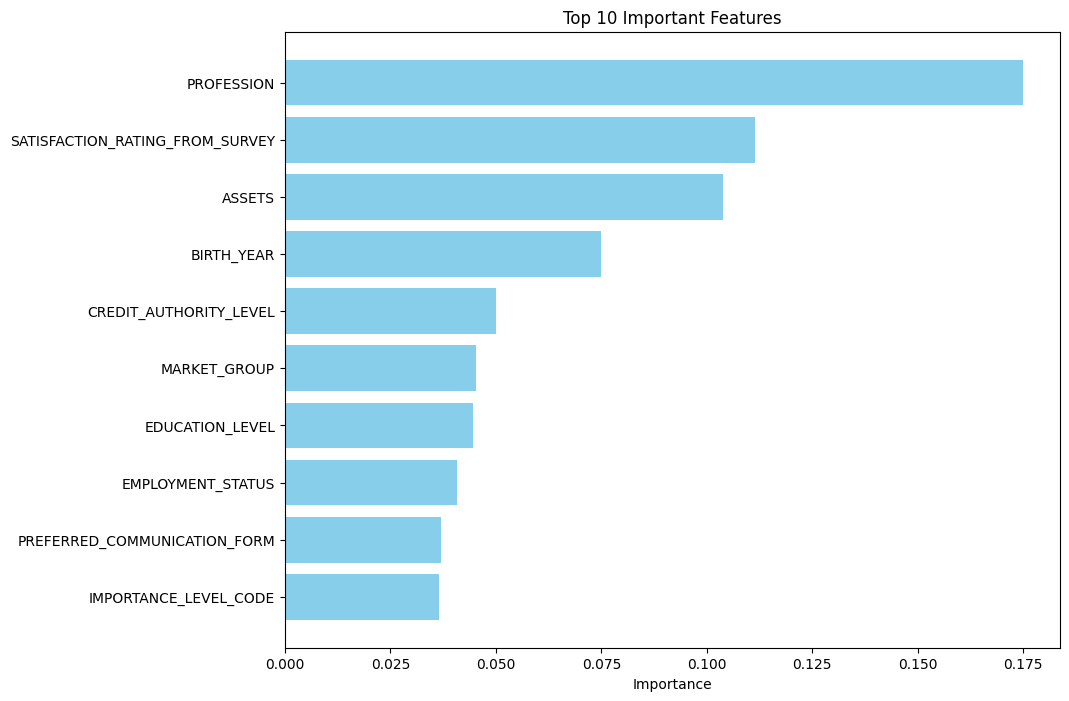

In [66]:
# Visualization
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_mapping['Feature'][:10], feature_importance_mapping['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.show()

Model Performance Evaluation

In [67]:
accuracy = accuracy_score(y_test, y_pred)

In [68]:
accuracy

0.975

In [69]:
print(classification_report(y_test, y_pred, target_names=label_encoders['PURSUIT'].classes_))


                     precision    recall  f1-score   support

Capital Acquisition       0.96      1.00      0.98        45
 Education Planning       1.00      0.91      0.95        23
    Estate Planning       0.93      1.00      0.97        43
 Increase Net Worth       1.00      1.00      1.00        63
       Philanthropy       1.00      0.25      0.40         4
Retirement Planning       1.00      1.00      1.00        22

           accuracy                           0.97       200
          macro avg       0.98      0.86      0.88       200
       weighted avg       0.98      0.97      0.97       200



In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)

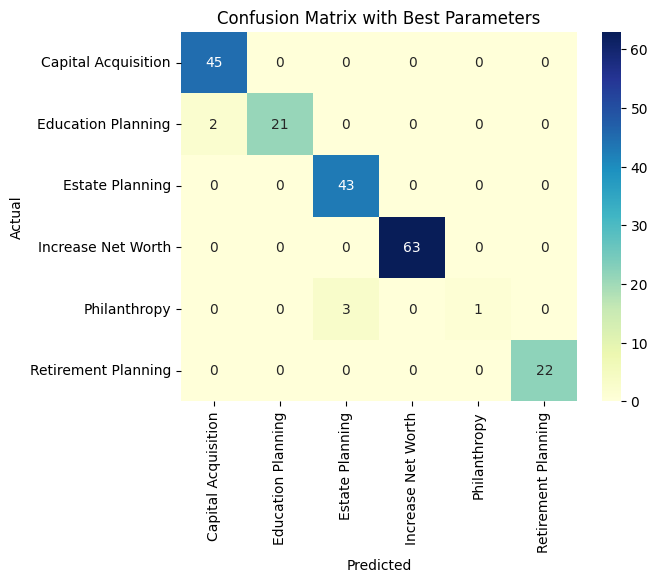

In [71]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoders['PURSUIT'].classes_, yticklabels=label_encoders['PURSUIT'].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Best Parameters")
plt.show()

In [73]:
# Assuming you have a dataframe 'data' and target column 'PURSUIT'
XX = data1.drop('PURSUIT', axis=1)  # Features
yy = data1['PURSUIT']  # Target variable

# Initialize an empty dictionary to store feature importances for each category
category_importances = {}

# Get the unique categories in the target variable (PURSUIT)
categories = y.unique()

# Train a separate RandomForest model for each category
for category in categories:
    # Create a binary classification problem for each category
    y_binary = (yy == category).astype(int)
    
    # Split data into train and test sets
    XX_train, XX_test, yy_train, yy_test = train_test_split(XX, y_binary, test_size=0.2, random_state=42)
    
    # Fit RandomForest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(XX_train, yy_train)

    # Get feature importances and store in the dictionary
    category_importances[category] = pd.DataFrame({
        'Feature': XX.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    


C:\Users\Ishwari Kadam\AppData\Local\Temp\ipykernel_10320\592107643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis', ax=axes[idx])
C:\Users\Ishwari Kadam\AppData\Local\Temp\ipykernel_10320\592107643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis', ax=axes[idx])
C:\Users\Ishwari Kadam\AppData\Local\Temp\ipykernel_10320\592107643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fea

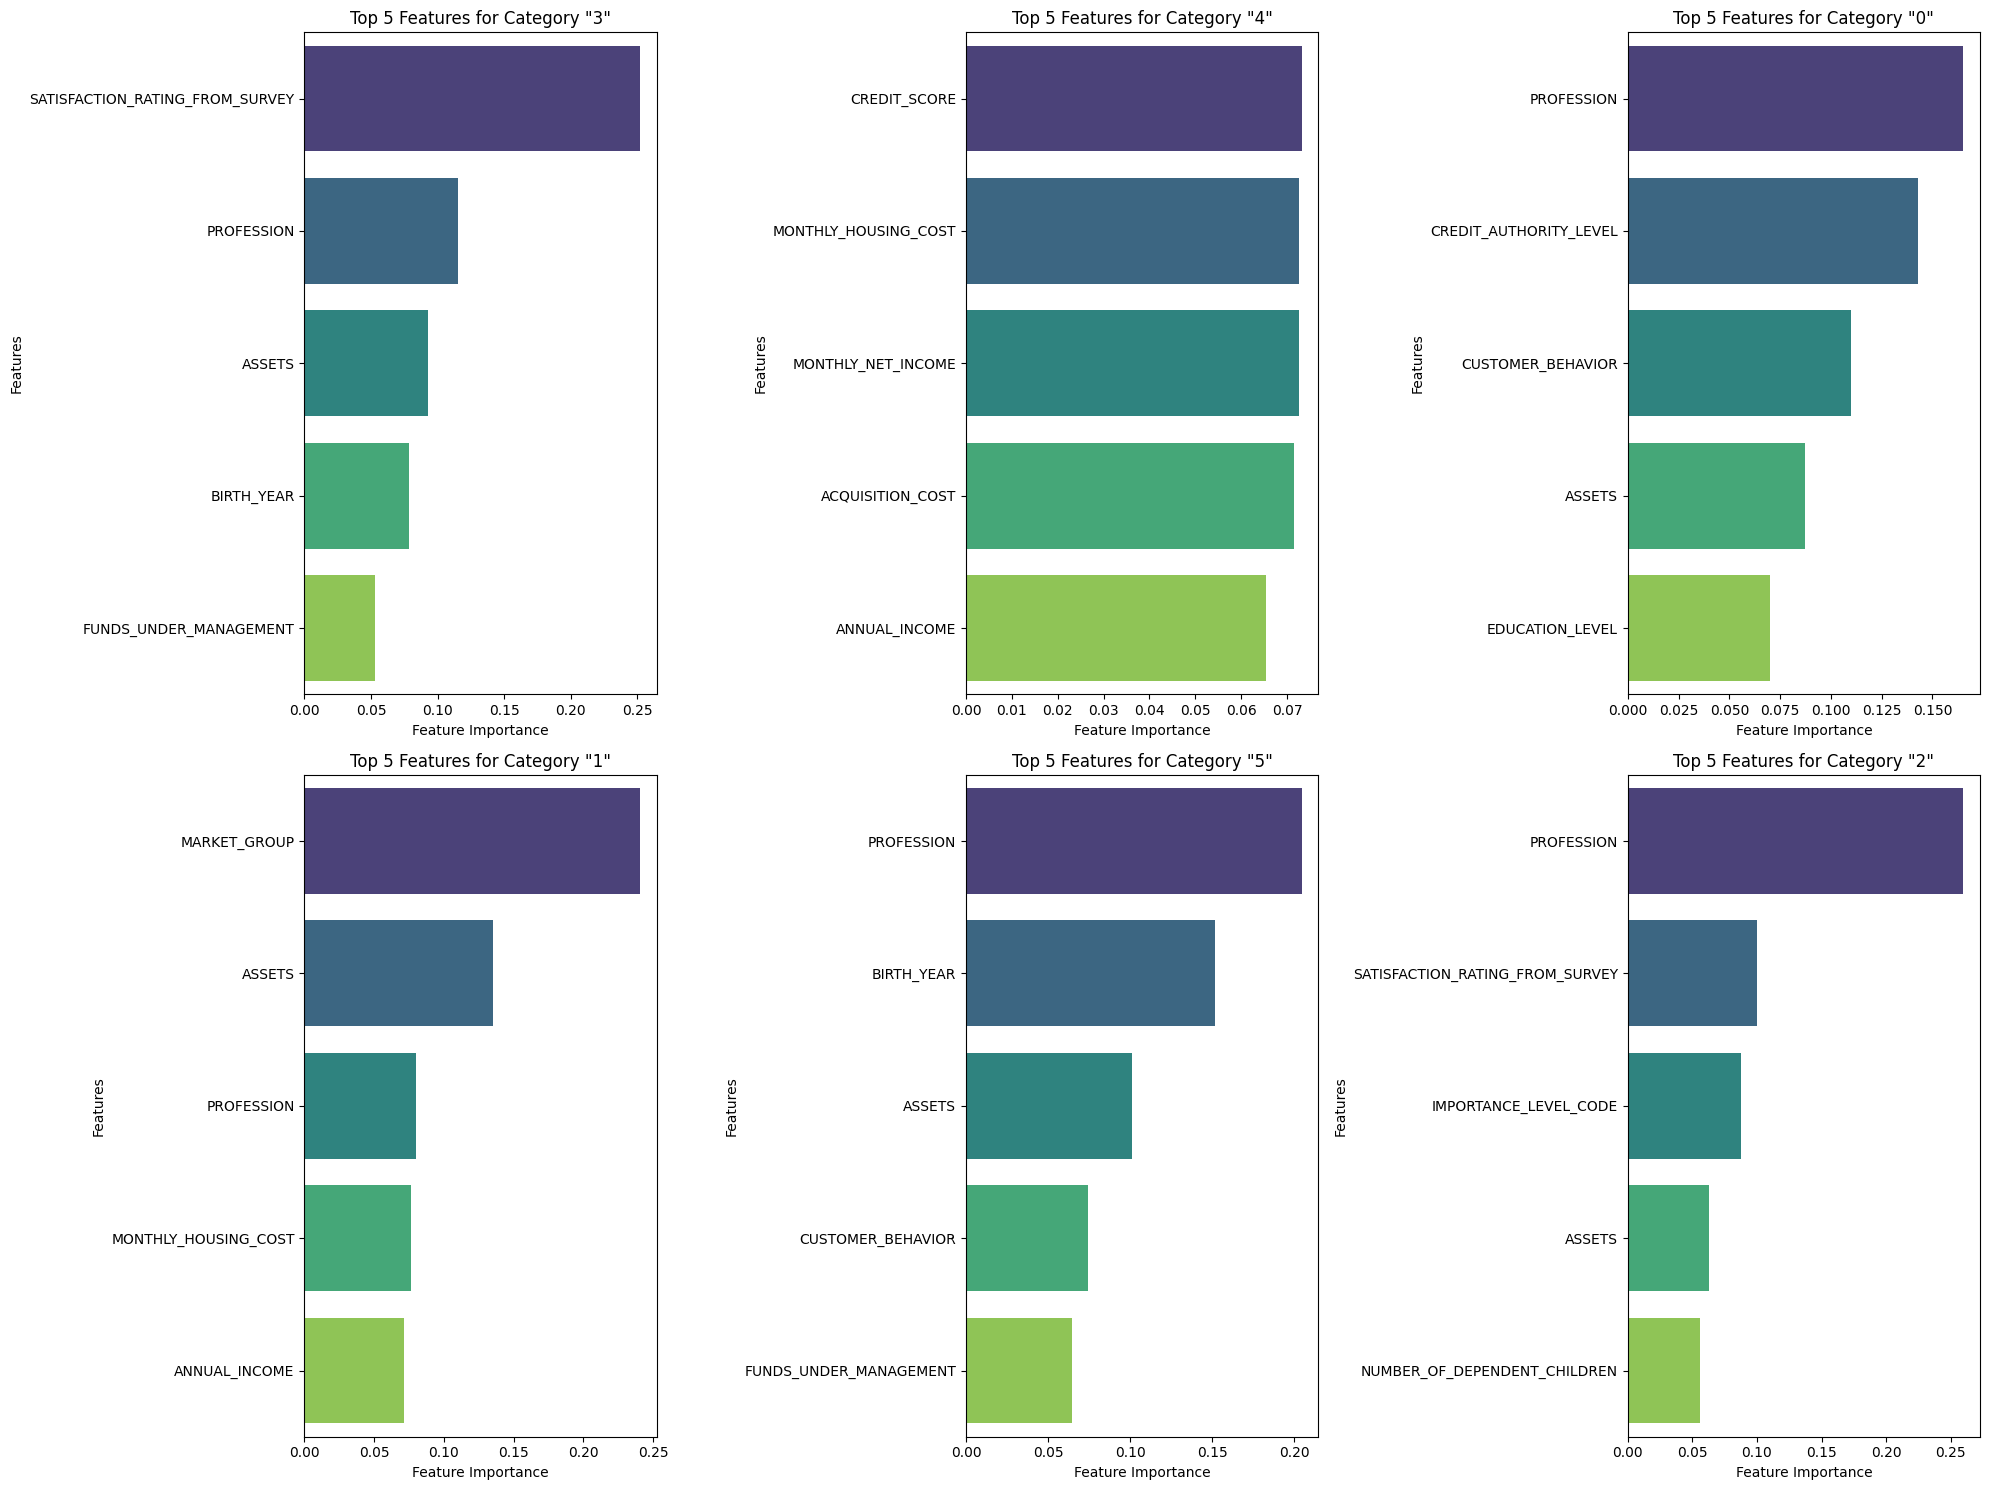

In [77]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each category and plot the top 5 important features
for idx, (category, importance_df) in enumerate(category_importances.items()):
    # Select top 5 important features
    top_features = importance_df.head(5)
    
    # Plot the barplot on the corresponding subplot axis
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis', ax=axes[idx])
    
    # Customize the plot
    axes[idx].set_title(f'Top 5 Features for Category "{category}"')
    axes[idx].set_xlabel('Feature Importance')
    axes[idx].set_ylabel('Features')

plt.tight_layout()
plt.show()

Conclusion - The Random Forest Model trained using GridSearch works best for this prediction with the accuracy of 97.5%. 
Overall, the important features for prediction are profession, satisfaction rating, assests, birth year and credit authority level.
Important features for each product
1. Capital Acquisition - Profession
2. Education Planning - Market group
3. Estate Planning - Profession
4. Increased Net worth - Satisfaction rating
5. Philanthropist - Credit Score
6. Retirement planning - Profession